In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from sklearn.model_selection import train_test_split


In [5]:
df = pd.read_csv('../../EDA/Multivariate_analysis/train.csv', usecols=['Age','Fare','Survived'])

In [6]:
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [7]:
x = df.drop(columns=['Survived'])
y = df['Survived']

In [8]:
df.shape

(891, 3)

In [9]:
x_train ,x_test , y_train , y_test  = train_test_split(x,y,random_state=2,test_size=.2)

In [10]:
x_train.shape , x_test.shape

((712, 2), (179, 2))

In [11]:
x_train.isnull().mean()

Age     0.207865
Fare    0.000000
dtype: float64

In [12]:
mean_age = x_train['Age'].mean()
median_age = x_train['Age'].median()

In [13]:
x_train['age_mean'] = x_train['Age'].fillna(mean_age)
x_train['age_median'] = x_train['Age'].fillna(median_age)

In [14]:
x_train.sample(5)

,Age,Fare,age_mean,age_median
316,24.0,26.0000,24.000000,24.00
42,NaN,7.8958,29.785904,28.75
646,19.0,7.8958,19.000000,19.00
797,31.0,8.6833,31.000000,31.00
170,61.0,33.5000,61.000000,61.00


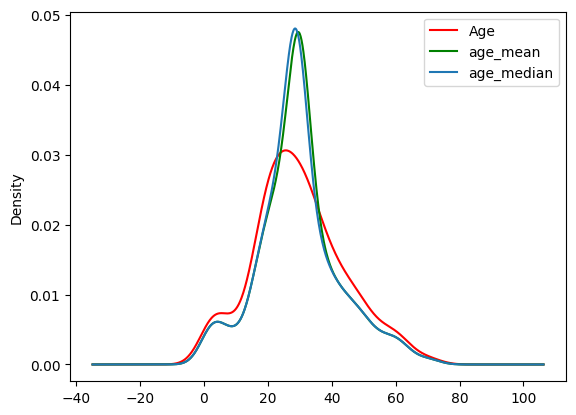

In [22]:
fig = plt.figure()
ax = fig.add_subplot(111)

x_train['Age'].plot(kind='kde',ax = ax, color='red')
x_train['age_mean'].plot(kind='kde',ax = ax, color='green')
x_train['age_median'].plot(kind='kde',ax = ax)

lines ,labels = ax.get_legend_handles_labels()
ax.legend(lines,labels,loc ='best')
plt.show()


In [23]:
x_train.cov()

,Age,Fare,age_mean,age_median
Age,204.349513,71.512440,204.349513,204.349513
Fare,71.512440,2368.246832,56.626587,58.986531
age_mean,204.349513,56.626587,161.812625,161.812625
age_median,204.349513,58.986531,161.812625,161.989566


In [24]:
x_train.corr()

,Age,Fare,age_mean,age_median
Age,1.000000,0.095814,1.000000,1.000000
Fare,0.095814,1.000000,0.091475,0.095235
age_mean,1.000000,0.091475,1.000000,0.999454
age_median,1.000000,0.095235,0.999454,1.000000


<Axes: >

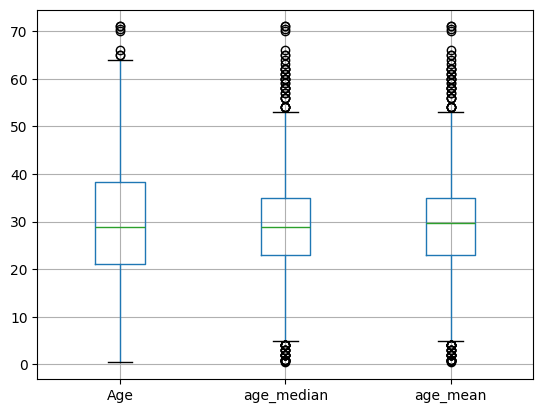

In [26]:
x_train[['Age', 'age_median', 'age_mean']].boxplot()


using Sklearn: 

In [30]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)


In [27]:

from sklearn.impute import SimpleImputer

imputer1 = SimpleImputer(strategy='median')
imputer2 = SimpleImputer(strategy='mean')

In [28]:

from sklearn.compose import ColumnTransformer

trf = ColumnTransformer([
    ('imputer1',imputer1,['Age']),
    ('imputer2',imputer2,['Fare'])
],remainder='passthrough')

In [31]:

trf.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1', SimpleImputer(strategy='median'),
                                 ['Age']),
                                ('imputer2', SimpleImputer(), ['Fare'])])

In [32]:

trf.named_transformers_['imputer1'].statistics_

array([28.75])

In [33]:

trf.named_transformers_['imputer2'].statistics_

array([32.28905604])

In [34]:
X_train = trf.transform(X_train)
X_test = trf.transform(X_test)

In [35]:
X_train

array([[ 40.    ,  27.7208],
       [  4.    ,  16.7   ],
       [ 47.    ,   9.    ],
       ...,
       [ 71.    ,  49.5042],
       [ 28.75  , 221.7792],
       [ 28.75  ,  25.925 ]])